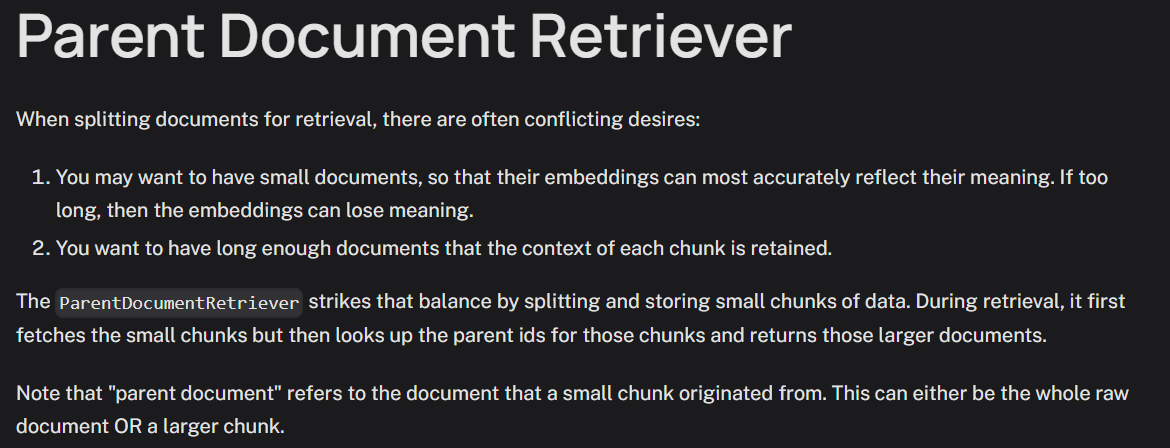

In [1]:
!pip -q install langchain langchain-google-genai tiktoken chromadb lark
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# can you download the blog posts from here https://www.dropbox.com/scl/fi/ulbt145sthizf2nazey49/langchain_blog_posts.zip?rlkey=9unhw0vukhlwacahmpnk5m591&dl=0

!mkdir -p blog_posts
!unzip -q /content/langchain_blog_posts.zip -d blog_posts

In [3]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [4]:
!pip show langchain

Name: langchain
Version: 0.2.6
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


## Parent Document Retriever

2 ways to use it:

1. Return full docs from smaller chunks look up
2. Return bigger chunks for smaller chunks look up

In [6]:
!pip install -q langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.1 MB/s eta 0:00:00


In [7]:
from langchain.schema import Document
from langchain.vectorstores import Chroma
from langchain.retrievers import ParentDocumentRetriever

## Text Splitting & Docloader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.storage import InMemoryStore
from langchain.document_loaders import TextLoader

## BGE Embeddings

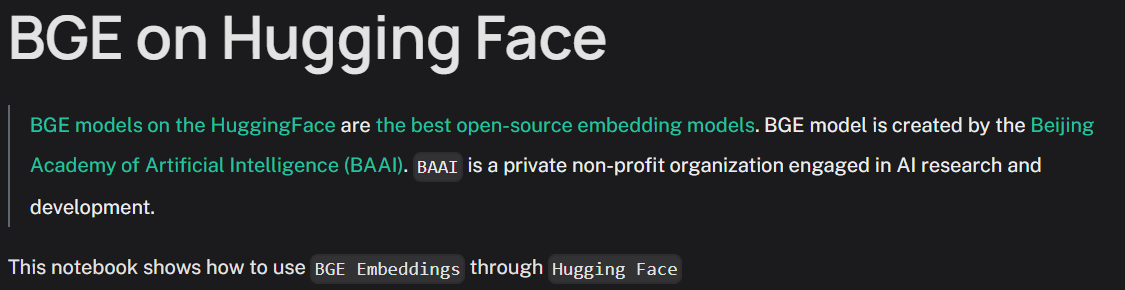

In [8]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

bge_embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs={'device': 'cuda'},
    encode_kwargs=encode_kwargs
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Data prep


In [9]:
loaders = [
    TextLoader('/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_benchmarking-question-answering-over-csv-data_.txt'),
]
docs = []
for l in loaders:
    docs.extend(l.load())

In [10]:
len(docs)

2

In [11]:
docs[0]

Document(page_content='URL: https://blog.langchain.dev/announcing-langsmith/\nTitle: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications\n\nLangChain exists to make it as easy as possible to develop LLM-powered applications.\n\nWe started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.\n\nThe blocker has now changed. While it’s easy to build a prototype of an application in ~5 lines of LangChain code, it’s still deceptively hard to take an application from prototype to production. The main is

## 1. Retrieving full documents rather than chunks
In this mode, we want to retrieve the full documents.

This is good to use if you initial full docs aren't too big themselves and you aren't going to return many of them

In [12]:
# This text splitter is used to create the child documents
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)


# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="full_documents",
    embedding_function=bge_embeddings
)

# The storage layer for the parent documents
store = InMemoryStore()

full_doc_retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
)

In [13]:
full_doc_retriever.add_documents(docs, ids=None)

In [14]:
# our
list(store.yield_keys())

['94370e77-52b2-4844-abcb-93b0c4f63cc7',
 '92c3a6ea-83c8-411a-84c8-04ecad07bd22']

In [15]:
vectorstore

In [16]:
sub_docs = vectorstore.similarity_search("what is langsmith", k=2)

In [17]:
len(sub_docs)

2

In [18]:
print(sub_docs[0].page_content)

Today, we’re introducing LangSmith, a platform to help developers close the gap between prototype and production. It’s designed for building and iterating on products that can harness the power–and wrangle the complexity–of LLMs.


In [19]:
retrieved_docs = full_doc_retriever.get_relevant_documents("what is langsmith")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [20]:
len(retrieved_docs[0].page_content)

11652

In [21]:
retrieved_docs[0].page_content

'URL: https://blog.langchain.dev/announcing-langsmith/\nTitle: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications\n\nLangChain exists to make it as easy as possible to develop LLM-powered applications.\n\nWe started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.\n\nThe blocker has now changed. While it’s easy to build a prototype of an application in ~5 lines of LangChain code, it’s still deceptively hard to take an application from prototype to production. The main issue that we see today 

## Retrieving larger chunks
Sometimes, the full documents can be too big to want to retrieve them as is. In that case, what we really want to do is to first split the raw documents into larger chunks, and then split it into smaller chunks. We then index the smaller chunks, but on retrieval we retrieve the larger chunks (but still not the full documents).

In [22]:
# This text splitter is used to create the parent documents - The big chunks
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

# This text splitter is used to create the child documents - The small chunks
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="split_parents", embedding_function=bge_embeddings)

# The storage layer for the parent documents
store = InMemoryStore()

In [23]:
big_chunks_retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [24]:
big_chunks_retriever.add_documents(docs)

In [25]:
len(list(store.yield_keys()))

18

In [26]:
sub_docs = vectorstore.similarity_search("what is langsmith")

In [27]:
len(sub_docs)

4

In [28]:
print(sub_docs[0].page_content)

Today, we’re introducing LangSmith, a platform to help developers close the gap between prototype and production. It’s designed for building and iterating on products that can harness the power–and wrangle the complexity–of LLMs.


In [29]:
retrieved_docs = big_chunks_retriever.get_relevant_documents("what is langsmith")

In [30]:
len(retrieved_docs)

2

In [31]:
len(retrieved_docs[0].page_content)

1869

In [32]:
print(retrieved_docs[0].page_content)

URL: https://blog.langchain.dev/announcing-langsmith/
Title: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications

LangChain exists to make it as easy as possible to develop LLM-powered applications.

We started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.

The blocker has now changed. While it’s easy to build a prototype of an application in ~5 lines of LangChain code, it’s still deceptively hard to take an application from prototype to production. The main issue that we see today is appli

In [33]:
print(retrieved_docs[1].page_content)

Understanding what exactly the final prompt to the LLM call is (after all the prompt template formatting, this final prompt can be long and obfuscated)

Understanding what exactly is returned from the LLM call at each step (before it is post-processed or transformed in any way)

Understanding the exact sequence of calls to LLM (or other resources), and how they are chained together

Tracking token usage

Managing costs

Tracking (and debugging) latency

Not having a good dataset to evaluate their application over

Not having good metrics with which to evaluate their application

Understanding how users are interacting with the product

All of these problems have parallels in traditional software engineering. And, in response, a set of practices and tools for debugging, testing, logging, monitoring, etc. has emerged to help developers abstract away common infrastructure and focus on what really matters - building their applications. LLM application developers deserve the same.

LangSmit

In [38]:
!pip install -q langchainhub

In [39]:
from langchain import hub
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain

retrieval_qa_chat_prompt = hub.pull("langchain-ai/retrieval-qa-chat")
llm = GoogleGenerativeAI(model="gemini-1.5-pro")

combine_docs_chain = create_stuff_documents_chain(
    llm, retrieval_qa_chat_prompt
)

retrieval_chain = create_retrieval_chain(big_chunks_retriever, combine_docs_chain)

In [40]:
query = "What is Langsmith?"
retrieval_chain.invoke({"input": query})

{'input': 'What is Langsmith?',
 'context': [Document(page_content='URL: https://blog.langchain.dev/announcing-langsmith/\nTitle: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications\n\nLangChain exists to make it as easy as possible to develop LLM-powered applications.\n\nWe started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.\n\nThe blocker has now changed. While it’s easy to build a prototype of an application in ~5 lines of LangChain code, it’s still deceptively hard to take an applicat